### Exploratory Data Analysis on Supermarket Sales Data

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**  

Supermarkets are experiencing growth in most populated cities, with high market competition. This dataset comprises three months' historical sales data for a supermarket company recorded across three different branches. 

**Data Dictionary**
1. *__Invoice id__*: Computer generated sales slip invoice identification number
2. *__Branch__*: Branch of supercenter (3 branches are available identified by A, B and C).
3. *__City__*: Location of supercenters
4. *__Custome type__*: Type of customers, recorded by Members for customers using member card and Normal for without member card.
5. *__Gender__*: Gender type of customer
6. *__Product line__*: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
7. *__Unit price__*: Price of each product in USD
8. *__Quantity__*: Number of products purchased by customer
9. *__Tax__*: 5% tax fee for customer buying
10. *__Total__*: Total price including tax
11. *__Date__*: Date of purchase (Record available from January 2019 to March 2019)
12. *__Time__*: Purchase time (10am to 9pm)
13. *__Payment__*: Payment used by customer for purchase (3 methods are available - Cash, Credit card and Ewallet)
14. *__COGS__*: Cost of goods sold
15. *__Gross margin percentage__*: Gross margin percentage
16. *__Gross income__*: Gross income
17. *__Rating__*: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

**Initial Data Exploration**

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df.head()
#df.tail()

Invoice ID Branch       City Customer type  Gender       Product line  \
0  750-67-8428      A     Yangon        Member  Female  Health and beauty   
1      75-8169      A     Yangon        Member    Male  Sports and travel   
2  853-23-2453      B   Mandalay        Member    Male  Health and beauty   
3  877-22-3308      A     Yangon        Member    Male  Health and beauty   
4  838-78-4295      C  Naypyitaw        Normal  Female  Health and beauty   

   Unit price  Quantity   Tax 5%     Total      Date   Time      Payment  \
0       74.69       7.0  26.1415  548.9715  1/5/2019  13:08      Ewallet   
1       15.81      10.0   7.9050  166.0050    3/6/19  12:27  Credit card   
2       75.74       4.0  15.1480  318.1080   2/14/19  14:35         Cash   
3       15.87      10.0   7.9350  166.6350   3/13/19  16:40         Cash   
4       33.47       2.0   3.3470   70.2870   2/10/19  15:43      Ewallet   

     cogs  gross margin percentage  gross income  Rating  
0  522.83                 4.761905       26.1415     9.1  
1  158.10                 4.761905        7.9050     8.6  
2  302.96                 4.761905       15.1480     7.6  
3  158.70                 4.761905        7.9350     5.8  
4   66.94                 4.761905        3.3470     6.7

In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Date']

0     2019-01-05
1     2019-03-06
2     2019-02-14
3     2019-03-13
4     2019-02-10
         ...    
936   2019-02-22
937   2019-02-18
938   2019-02-18
939   2019-03-10
940   2019-01-26
Name: Date, Length: 941, dtype: datetime64[ns]

In [8]:
df.set_index('Date', inplace=True)

In [9]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-06      75-8169      A     Yangon        Member    Male   
2019-02-14  853-23-2453      B   Mandalay        Member    Male   
2019-03-13  877-22-3308      A     Yangon        Member    Male   
2019-02-10  838-78-4295      C  Naypyitaw        Normal  Female   

                 Product line  Unit price  Quantity   Tax 5%     Total   Time  \
Date                                                                            
2019-01-05  Health and beauty       74.69       7.0  26.1415  548.9715  13:08   
2019-03-06  Sports and travel       15.81      10.0   7.9050  166.0050  12:27   
2019-02-14  Health and beauty       75.74       4.0  15.1480  318.1080  14:35   
2019-03-13  Health and beauty       15.87      10.0   7.9350  166.6350  16:40   
2019-02-10  Health and beauty       33.47       2.0   3.3470   70.2870  15:43   

                Payment    cogs  gross margin percentage  gross income  Rating  
Date                                                                            
2019-01-05      Ewallet  522.83                 4.761905       26.1415     9.1  
2019-03-06  Credit card  158.10                 4.761905        7.9050     8.6  
2019-02-14         Cash  302.96                 4.761905       15.1480     7.6  
2019-03-13         Cash  158.70                 4.761905        7.9350     5.8  
2019-02-10      Ewallet   66.94                 4.761905        3.3470     6.7

In [10]:
df.describe()

Unit price    Quantity      Tax 5%        Total        cogs  \
count  934.000000  921.000000  941.000000   941.000000  941.000000   
mean    55.563758    5.500543   15.300036   321.300748  306.000712   
std     26.502647    2.935215   11.710552   245.921596  234.211043   
min     10.080000    1.000000    0.508500    10.678500   10.170000   
25%     32.732500    3.000000    5.977000   125.517000  119.540000   
50%     54.795000    5.000000   12.060000   253.260000  241.200000   
75%     77.680000    8.000000   22.428000   470.988000  448.560000   
max     99.960000   10.000000   49.650000  1042.650000  993.000000   

       gross margin percentage  gross income      Rating  
count             9.410000e+02    941.000000  941.000000  
mean              4.761905e+00     15.300036    6.979490  
std               6.042825e-14     11.710552    1.720284  
min               4.761905e+00      0.508500    4.000000  
25%               4.761905e+00      5.977000    5.500000  
50%               4.761905e+00     12.060000    7.000000  
75%               4.761905e+00     22.428000    8.500000  
max               4.761905e+00     49.650000   10.000000

**Univariate Analysis**

**Question**: What does the distribution of customer ratings look like? Is it skewed?

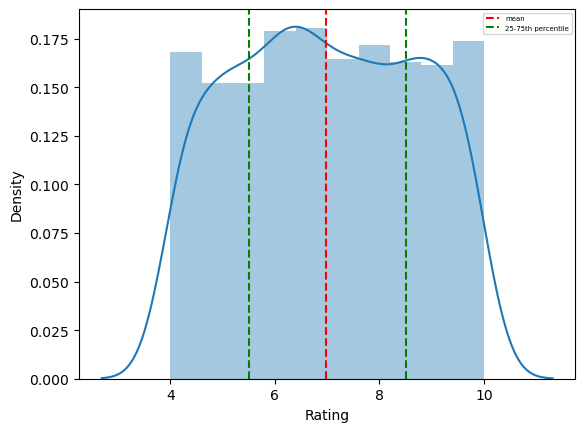

In [11]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25), c='green', ls='--', label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'],75), c='green', ls='--')
plt.legend(loc='upper right', fontsize=5)

The distribution appears to be uniform, indicating that no rating numbers stand out significantly and there is no apparent skew in either direction.

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

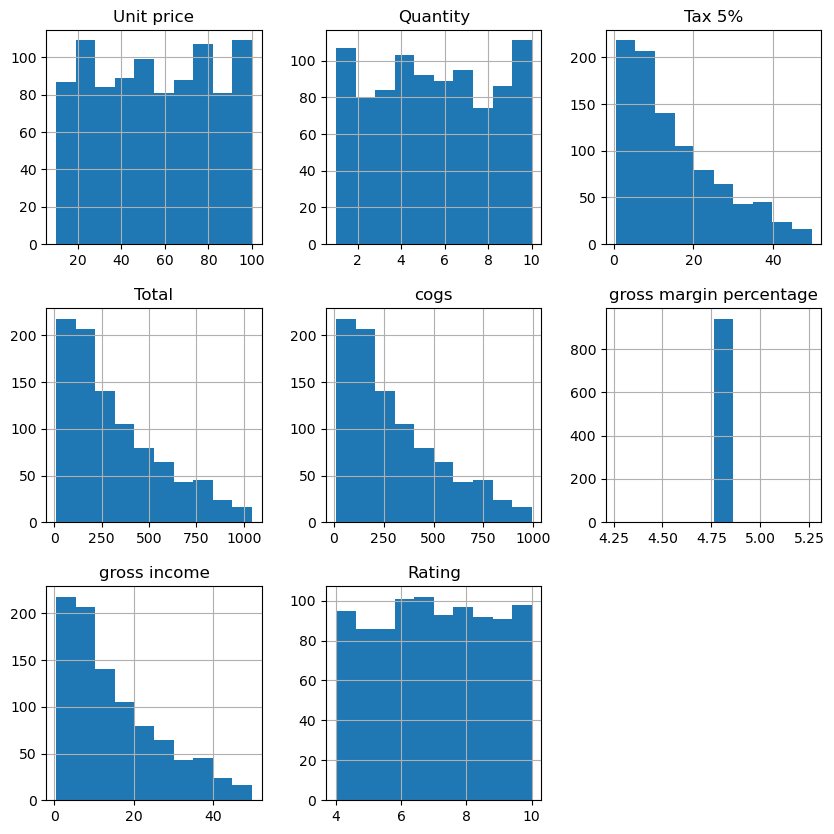

In [12]:
df.hist(figsize=(10,10))

* The *unit price* follows a uniform distribution.
* The *tax* distribution is right-skewed with the majority of the tax collected between zero and 20. However, there are some exceptional cases where the tax exceeds 40. 
* The *total price including tax*, the *cost of goods sold*, and the *gross income* is highly correlated, and thus their distributions are nearly identical.
* The *gross margin percentage* is a constant and that's why it doesn't exhibit much variation. 
* As previously observed, the *user rating* follows a uniform distribution.

**Question**: Is there a significant variation in the aggregate sales figures across different branches?

<AxesSubplot:xlabel='Branch', ylabel='count'>

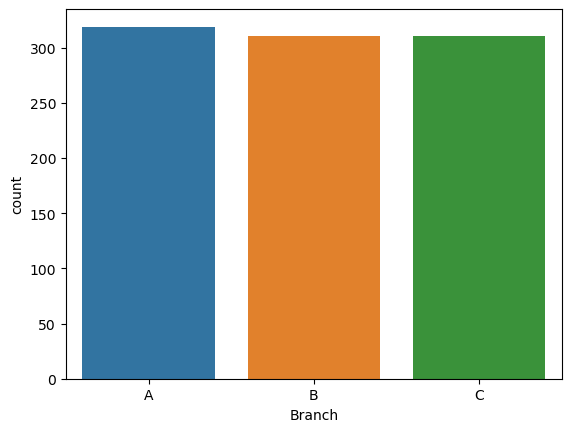

In [13]:
sns.countplot(df['Branch'])

In [14]:
df['Branch'].value_counts()

A    319
B    311
C    311
Name: Branch, dtype: int64

As we can observe, there is not much difference between them.

**Question**: What about the variation in payment methods?

<AxesSubplot:xlabel='Payment', ylabel='count'>

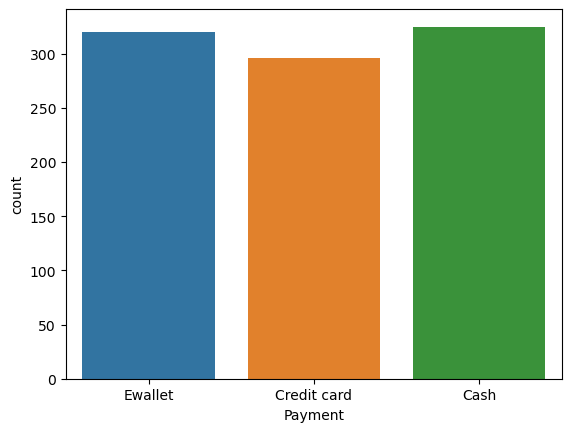

In [15]:
sns.countplot(df['Payment'])

In [16]:
df['Payment'].value_counts()

Cash           325
Ewallet        320
Credit card    296
Name: Payment, dtype: int64

It's surprising that the least popular payment method among customers appears to be credit card.

**Bivariate Analysis**

**Question**: Is there a correlation observed between gross income and customer ratings?

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

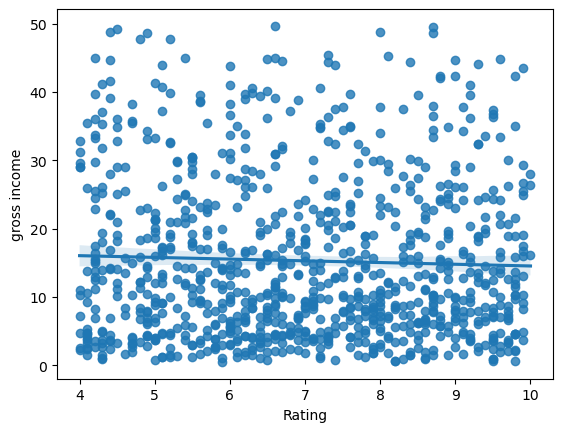

In [17]:
sns.regplot(df['Rating'], df['gross income'])

There appears to be no discernible impact or correlation between customer rating and gross income. The trend line is almost entirely horizontal, indicating a lack of any meaningful relationship between the two variables.

**Question**: What about if there is a correlation observed between gross income and Branch?

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

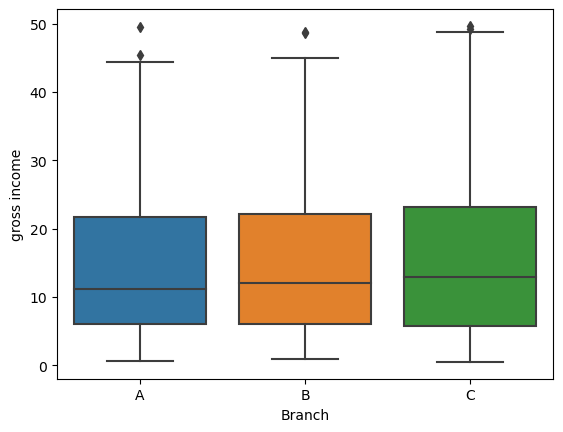

In [18]:
sns.boxplot(df['Branch'], df['gross income'])

We observe that the median gross income of Branch A is approximately 10. Branch C's median gross income, on the other hand, appears to be slightly higher, and Branch B's is comparable to that of Branch A. Overall, there doesn't seem to be a significant difference in gross income among the different branches, at least when considering the aggregate level.

**Question**: What about if there is a correlation observed between gross income and gender?

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

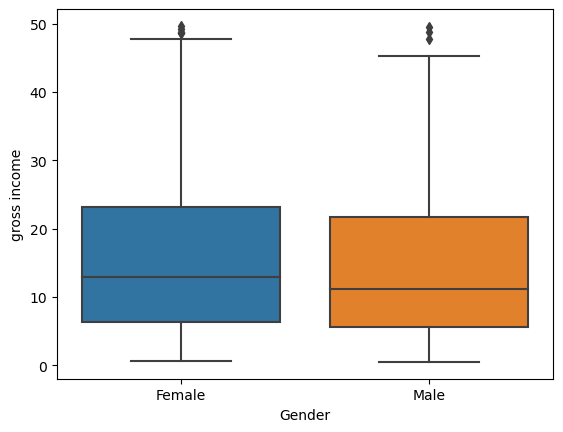

In [19]:
sns.boxplot(df['Gender'], df['gross income'])

The expenditure patterns of men and women in this dataset are comparable, with no significant difference observed. However, at the 75th percentile, women tend to spend more than men. On average though, their spending habits appear to be quite similar.

**Question**: Is there a noticable time trend in gross income?

<AxesSubplot:xlabel='Date', ylabel='gross income'>

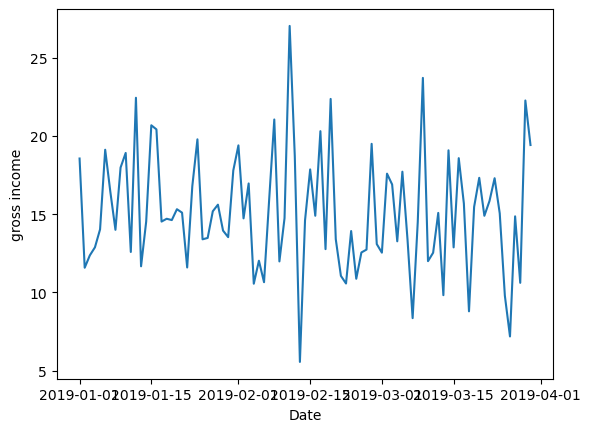

In [20]:
sns.lineplot(df.groupby(df.index).mean().index, 
             df.groupby(df.index).mean()['gross income'])
# Because the data frame may contain multiple customers on a given date, it cannot be used directly for this specific plot. So, it is essential to aggregate the data first.

There appears to be no discernible time trend in this graph. It seems to fluctuate consistently around the same mean value, with some days showing high gross income figures and others showing low ones. Therefore, it doesn't appear to follow a specific pattern. It's possible that this lack of trend is due to our limited timeframe of only three months of data.

**Dealing with Duplicate Rows and Missing Values**

In [21]:
df.duplicated().sum()

3

In [22]:
# We can eliminate duplicates by:
df.drop_duplicates(inplace=True)

In [23]:
# the ratio of missing values in columns
df.isna().sum()/len(df)

Invoice ID                 0.000000
Branch                     0.000000
City                       0.000000
Customer type              0.077825
Gender                     0.000000
Product line               0.041578
Unit price                 0.006397
Quantity                   0.020256
Tax 5%                     0.000000
Total                      0.000000
Time                       0.000000
Payment                    0.000000
cogs                       0.000000
gross margin percentage    0.000000
gross income               0.000000
Rating                     0.000000
dtype: float64

<AxesSubplot:ylabel='Date'>

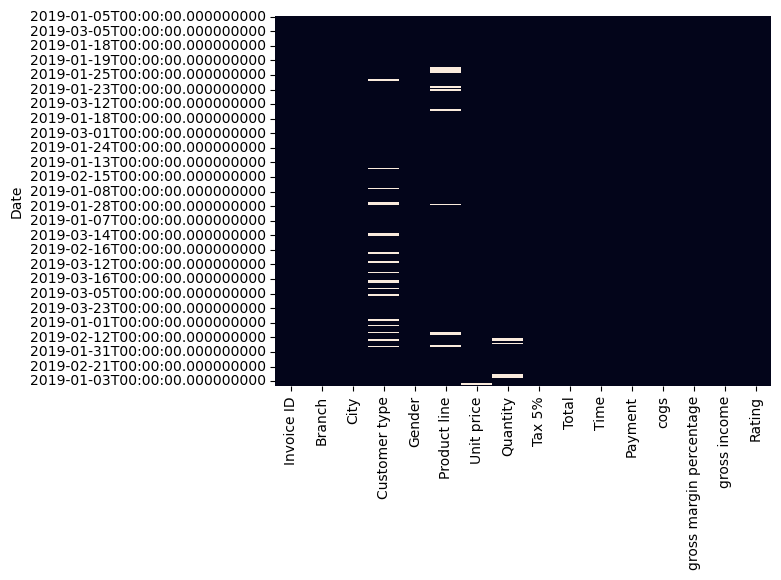

In [24]:
sns.heatmap(df.isnull(), cbar=False)

In [25]:
#for handling missing values in numeric columns:
df.fillna(df.mean(), inplace=True)

In [26]:
#for handling missing values in categorical columns:
df.fillna(df.mode().iloc[0], inplace=True)

<AxesSubplot:ylabel='Date'>

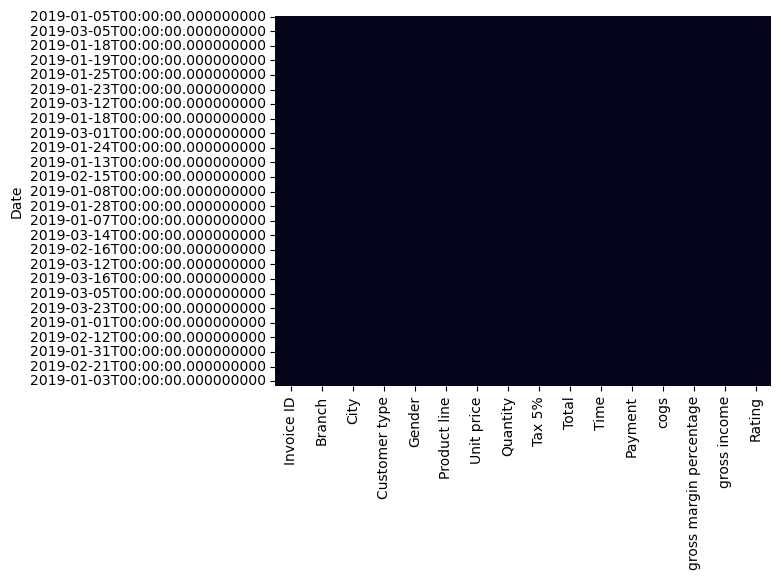

In [27]:
#check to see if there are still missing values present in the data
sns.heatmap(df.isnull(), cbar=False)

**Note**: There is actually a package, namely Pandas profiling package, that significantly streamlines much of the work we have accomplished so far in the project.

Let's use this package now:

In [28]:
df2 = pd.read_csv('supermarket_sales.csv')

In [29]:
profiling = ProfileReport(df2)
profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Correlation Analysis**

In [30]:
round(np.corrcoef(df['gross income'], df['Rating'])[0][1],2)

-0.03

In [31]:
round(df.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.00    0.63   0.63  0.63   
Quantity                       0.00      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                         0.00     -0.03   -0.03  -0.03 -0.03   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63    0.00  
Quantity                                     NaN          0.70   -0.03  
Tax 5%                                       NaN          1.00   -0.03  
Total                                        NaN          1.00   -0.03  
cogs                                         NaN          1.00   -0.03  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.03  
Rating                                       NaN         -0.03    1.00

<AxesSubplot:>

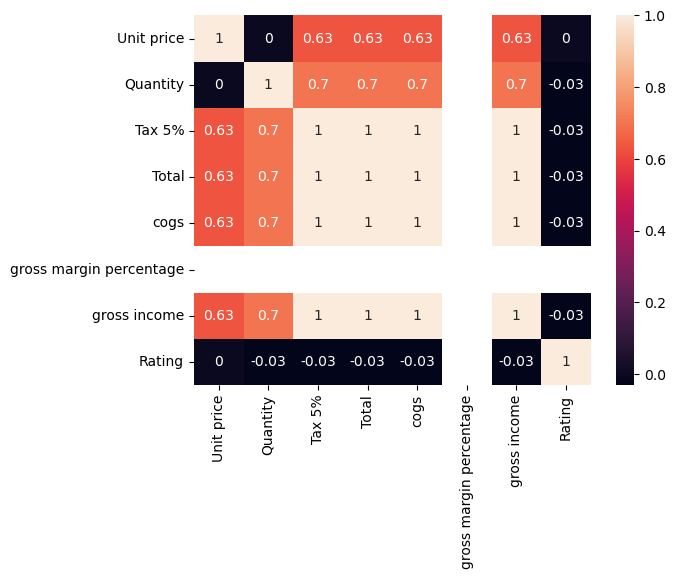

In [32]:
sns.heatmap(round(df.corr(),2), annot=True)

The data reveals a fascinating insight: The customer rating appears to have very little correlation with any other variables in the dataset. Surprisingly, it seems that the amount a customer spends does not significantly impact their shopping experience rating at all.